In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import random

__There are entries in horsepower that are '?'s (ie. missing data). Remove these rows__

In [2]:
csv_path = r'C:\Users\The_Iron_Maiden\Documents\Python Scripts\Auto.csv'

auto_data = pd.read_csv(csv_path)

auto_data = auto_data.loc[auto_data['horsepower'] != '?'] # get rid of rows that have missing data
auto_data = auto_data.reset_index()
auto_data

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Validation Set Approach

In [3]:
np.random.seed(1)

In [4]:
train_ind = np.sort(np.random.choice(392, size=196, replace=False))
test_ind = np.setdiff1d(np.arange(392), train_ind)
print(train_ind)
print('')
print(test_ind)

[  0   4   5   6   8   9  11  12  13  14  16  17  18  19  23  27  28  29
  34  38  39  41  42  44  51  58  59  61  62  65  67  70  73  78  79  80
  81  82  84  85  88  89  90  91  92  93  95  98  99 100 102 105 106 107
 108 110 111 112 117 119 120 122 123 124 125 127 131 132 135 138 139 145
 146 147 150 154 158 159 160 161 162 163 165 167 169 171 172 173 174 175
 179 180 185 186 188 189 191 192 197 201 204 207 208 213 214 218 222 223
 224 225 227 228 229 230 232 233 234 236 238 244 246 247 248 250 251 257
 258 260 267 271 272 273 274 277 278 283 285 287 289 290 291 292 293 294
 298 301 303 304 305 306 307 310 311 314 315 318 323 324 326 327 329 331
 332 333 334 338 339 342 343 345 348 349 351 354 355 358 359 360 361 366
 368 369 371 372 373 375 377 379 381 383 385 386 388 389 390 391]

[  1   2   3   7  10  15  20  21  22  24  25  26  30  31  32  33  35  36
  37  40  43  45  46  47  48  49  50  52  53  54  55  56  57  60  63  64
  66  68  69  71  72  74  75  76  77  83  86  87  94  96 

In [5]:
train_data = auto_data.iloc[train_ind]
test_data = auto_data.iloc[test_ind]
train_data.head(3)

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [6]:
x_train = pd.DataFrame(train_data['horsepower'])
y_train = pd.DataFrame(train_data['mpg'])
x_test = pd.DataFrame(test_data['horsepower'])
y_test = pd.DataFrame(test_data['mpg'])

In [7]:
regr = linear_model.LinearRegression()
# fit the LR
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred = regr.predict(x_test)

np.mean( (y_test - y_pred)**2 )

mpg    23.361903
dtype: float64

__The estimated test MSE for the linear regression fit is the value above__

__Values may be different due to different seed initialization__

## LOOCV

In [9]:
from sklearn.model_selection import LeaveOneOut

In [10]:
loo = LeaveOneOut()
n_splits = loo.get_n_splits(auto_data['horsepower'])
n_splits

392

__NOTE:__ sklearn wants input dimensions as samples x features, but since we only have one feature and therefore a 1d pandas series vector as input, sklearn doesn't like this. One way to get around this is to turn the pandas series into a dataframe

But then in this line `mse = np.mean( (y_test_loocv.values - y_pred_loocv[0])**2 )`, `y_pred_loocv` comes out as a 2d array even though there's only one value because we are only testing one sample. We need to grab that single value out of the array for the MSE to calculate.

In [11]:
# function to run all iterations of LOOCV on a given dataset and model; returns mse for all iters
def loocv_full(model_in, n_splits, data_X, data_y):
    
    loocv_mse = np.empty(n_splits)

    for idx, (train_index, test_index) in enumerate(loo.split(auto_data['horsepower'])):

        #if idx in [0, 1]:
        #    print("TRAIN:", train_index, "TEST:", test_index)

        # split the data
        X_train_loocv, X_test_loocv = data_X[train_index], data_X[test_index]
        y_train_loocv, y_test_loocv = data_y[train_index], data_y[test_index]

        # fit the LR
        regr_loocv.fit(pd.DataFrame(X_train_loocv), pd.DataFrame(y_train_loocv))
       
        # predict and calculate MSE
        y_pred_loocv = regr_loocv.predict(pd.DataFrame(X_test_loocv))
        mse = np.mean( (y_test_loocv.values - y_pred_loocv[0])**2 )

        loocv_mse[idx] = mse
    
    return loocv_mse

In [12]:
regr_loocv = linear_model.LinearRegression()
loocv_mse = loocv_full(regr_loocv, n_splits, auto_data['horsepower'], auto_data['mpg'])

In [13]:
np.set_printoptions(suppress=True)
print(np.round(loocv_mse, 2))

print('')

mean_loocv_mse = np.mean(loocv_mse)
print('mean ' + str(mean_loocv_mse))

[  2.02   1.25   3.07   0.07   0.71  41.36  81.38  67.15  97.05  26.34
   3.67   0.47   1.61  97.05   0.89   8.69  44.12  30.66   0.92  45.32
   1.46   3.01   0.    15.3   22.5   16.79   2.77  18.54   0.23   0.92
   5.18   0.    26.67  54.48  51.41  49.94  38.04   0.01   2.91   3.23
   5.17   0.23   0.01   0.48  21.02  43.56  26.67  65.12  11.37   5.18
   1.25   4.28   1.77  35.8   12.15   8.41   0.89   5.37  71.76  33.02
  28.92   0.81   2.91   1.61   3.23   0.56  15.84   6.19   7.3    9.62
  31.81   1.61  41.47  23.63   5.17  18.22  35.56  27.24   9.36  19.14
   6.72   2.65   0.48   0.92   0.48   5.17  16.57  18.75   1.61  11.4
  10.75   4.05   5.17  51.41  60.76   0.48  28.9   66.79  38.04  65.12
   3.79  45.32  28.     2.53   0.01   0.23  38.04  36.77  57.83   9.65
  60.1   56.9    4.21   0.07   4.24 162.5   10.41  16.93  31.23  10.67
   1.61   2.05   0.46   0.28  24.54  26.67  84.18   2.72   1.72   5.46
   9.67  66.79  43.43  28.9    3.41  10.75   5.17  14.87   5.17   4.72
  11.4 

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_models = [ ]
poly_models_mse = []

for idx, poly_order in enumerate(range(1,6)):
    
    print('Running poly order: ' + str(poly_order))
    
    # apply polynomial transformation of X data
    polynomial_features = PolynomialFeatures(degree=poly_order)
    poly_models.append(polynomial_features.fit_transform(pd.DataFrame(auto_data['horsepower'])))
    
    # run LOOCV on poly data
    poly_models_mse.append( loocv_full(regr_loocv, n_splits, poly_models[idx], auto_data['mpg']) )

Running poly order: 1
Running poly order: 2
Running poly order: 3
Running poly order: 4
Running poly order: 5


In [15]:
list(map(np.mean, poly_models_mse))

[24.231513517929226,
 19.24821312448974,
 19.334984064079364,
 19.424430309616614,
 19.033204805230227]

## Kfold CV

In [16]:
from sklearn.model_selection import KFold

In [17]:
kf = KFold(n_splits=5)

In [18]:
n_folds = kf.get_n_splits(auto_data)
print(n_folds)

5


In [19]:
kfold_mse = np.empty(n_folds)

for idx, (train_index, test_index) in enumerate(kf.split(auto_data)):
    print("TEST:", test_index)
    X_train_kfold, X_test_kfold = auto_data['horsepower'][train_index], auto_data['horsepower'][test_index]
    y_train_kfold, y_test_kfold = auto_data['mpg'][train_index], auto_data['mpg'][test_index]
    
    regr_kfold = linear_model.LinearRegression()
    # fit the LR
    regr_kfold.fit(pd.DataFrame(X_train_kfold), pd.DataFrame(y_train_kfold))
    
    y_pred_kfold = regr.predict(pd.DataFrame(X_test_kfold))
    mse = np.mean( (y_test_kfold.values - y_pred_kfold)**2 )
    
    print(y_test_kfold)
    print('')
    kfold_mse[idx] = mse

TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78]
0     18.0
1     15.0
2     18.0
3     16.0
4     17.0
      ... 
74    14.0
75    18.0
76    22.0
77    21.0
78    26.0
Name: mpg, Length: 79, dtype: float64

TEST: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157]
79     22.0
80     28.0
81     23.0
82     28.0
83     27.0
       ... 
153    15.0
154    16.0
155    15.0
156    16.0
157    14.0
Name: mpg, Length: 79, dtype: float64

TEST: [158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 1

In [20]:
print(np.round(kfold_mse, 2))

print('')

mean_kfold_mse = np.mean(kfold_mse)
print('mean ' + str(mean_kfold_mse))

[94.03 87.42 63.37 67.74 62.58]

mean 75.03062036923298


## Bootstrap

In [21]:
from statistics import variance

In [22]:
csv_path = r'C:\Users\The_Iron_Maiden\Documents\Python Scripts\portfolio.csv'

portfolio_data = pd.read_csv(csv_path)

In [23]:
print(portfolio_data.shape)
portfolio_data.head()
x = portfolio_data['X'].values
y = portfolio_data['Y'].values

(100, 2)


In [24]:
def calc_alpha(x_in, y_in):
    xy_stack = np.stack((x_in, y_in), axis=0)
    return (variance(y_in) - np.cov(xy_stack)[0, 1])/(variance(x_in) + variance(y_in) - 2*np.cov(xy_stack)[0, 1])

In [25]:
n_boots = 1000

alpha_boot = np.empty(n_boots)

for i in range(n_boots):
    
    inds = np.random.choice(np.arange(100), 100, replace=True)
    x_boot = x[inds]
    y_boot = y[inds]
    alpha_boot[i] = calc_alpha(x_boot, y_boot)
    
    #print(calc_alpha(x_boot, y_boot))


mean: 0.5791417391452556; std err: 0.0028588378685669986


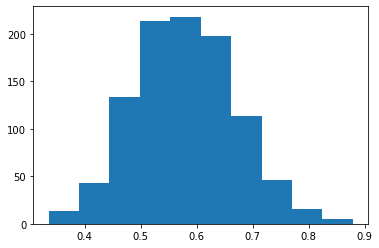

In [26]:
plt.hist(alpha_boot)
alpha_boot_mean = np.mean(alpha_boot)
alpha_boot_stderr = np.std(alpha_boot)/(n_boots**0.5)
print('mean: {}; std err: {}'.format(alpha_boot_mean, alpha_boot_stderr))